In [1]:
import subprocess as sp
import os
import re
import numpy as np
from path import Path
from collections import namedtuple

In [2]:
root = '/work/yadegari/multibasin_study_1/'

In [3]:
parse_line = lambda l: float(re.match('.+\((.+?),', l)[1])

In [4]:
groups = ['with_bucket_system', 'without_bucket_system']
sets = [f'set_{i}' for i in range(1, 11)]

In [5]:
mbs_results = {gr: {set_k: None for set_k in sets} for gr in groups}


for group in groups:
    for set_k in sets:
        with Path(f'{group}/{set_k}'):
            with open('CV/kges.txt') as fh:
                mbs_results[group][set_k] = [
                    parse_line(l) for l in fh.readlines()
                ]

In [6]:
lut_kges = {}

with open('/work/yadegari/optim_crash/test_run/optims_lut/kges.dat') as fh:
    lut_kges_file = fh.readlines()
    for nr, kges in zip(lut_kges_file[::2], lut_kges_file[1::2]):
        lut_kges[nr.rstrip('\n')] = eval(kges)[0]


In [7]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

def draw_empCDF(ax, x):
    aa = np.array(x)
    # estimated CDF of values
    ecdf_aa = ECDF(aa)
    # create points where CDF is needed (for plot)
    lb  = np.percentile(aa, 0.5)
    ub  = np.percentile(aa,99.5)
    x_grid = np.arange(lb,ub+(ub-lb)/4000.,(ub-lb)/4000.)
    # derive points of ECDF
    aa_cdf = ecdf_aa(x_grid)
    return ax.plot(x_grid, aa_cdf)

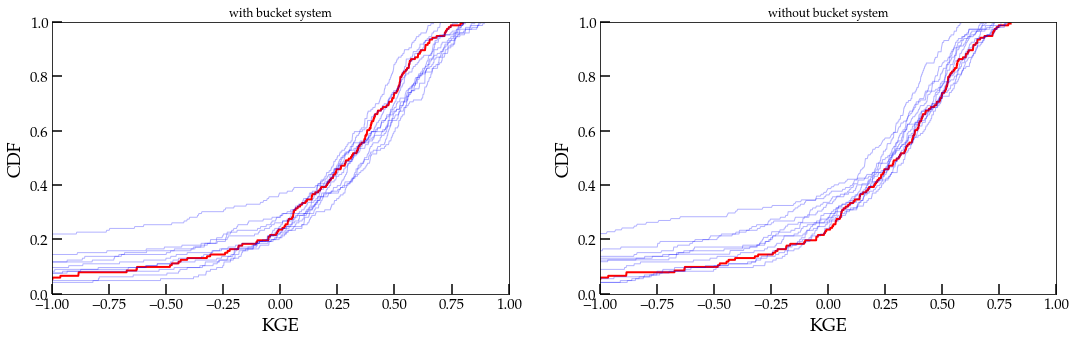

In [8]:
plt.rcParams["font.family"] = "P052"

group = 'with_bucket_system'

kge_threshold = -100
prune_kges = lambda vals, kge_threshold: [v for v in vals if v > kge_threshold]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

def draw_cdf(ax, group, lut_kges, mbs_results):
    lh_lut = draw_empCDF(ax, list(lut_kges.values()))[0]
    lh_lut.set_color('r')
    lh_lut.set_linewidth(2)


    lhs = {}
    for set_k, v in mbs_results[group].items():
        lh = draw_empCDF(ax, prune_kges(np.array(v), kge_threshold))
        lhs[set_k] = {'lh': lh[0]}

    for lh in lhs.values():
        lh['lh'].set_alpha(0.3)
        lh['lh'].set_linewidth(1)
        lh['lh'].set_color('b')
    
    ax.tick_params(direction='in',
                   length=10,
                   width=1.5,
                   labelsize=15)  
    ax.set_xticks(np.arange(-1, 1.1, .25))
    
    ax.set_xlabel('KGE', fontsize=18)
    ax.set_ylabel('CDF', fontsize=18)


    kwargs = {
        'title': group.replace('_', ' '),
        'ylim': [0, 1],
        'xlim': [-1, 1],
    }
    ax.set(**kwargs);

    
draw_cdf(ax1, 'with_bucket_system', lut_kges, mbs_results)
draw_cdf(ax2, 'without_bucket_system', lut_kges, mbs_results)
    
plt.savefig('cv_multi_all.pdf')

In [9]:
def zip_axes(iterator, axes): 
    '''remove unused axes and return a zip with the remaining ones'''
    axes = axes.reshape(-1, 1).squeeze()

    for ax in axes[len(iterator):]:
        ax.remove()
        
    return zip(iterator, axes)

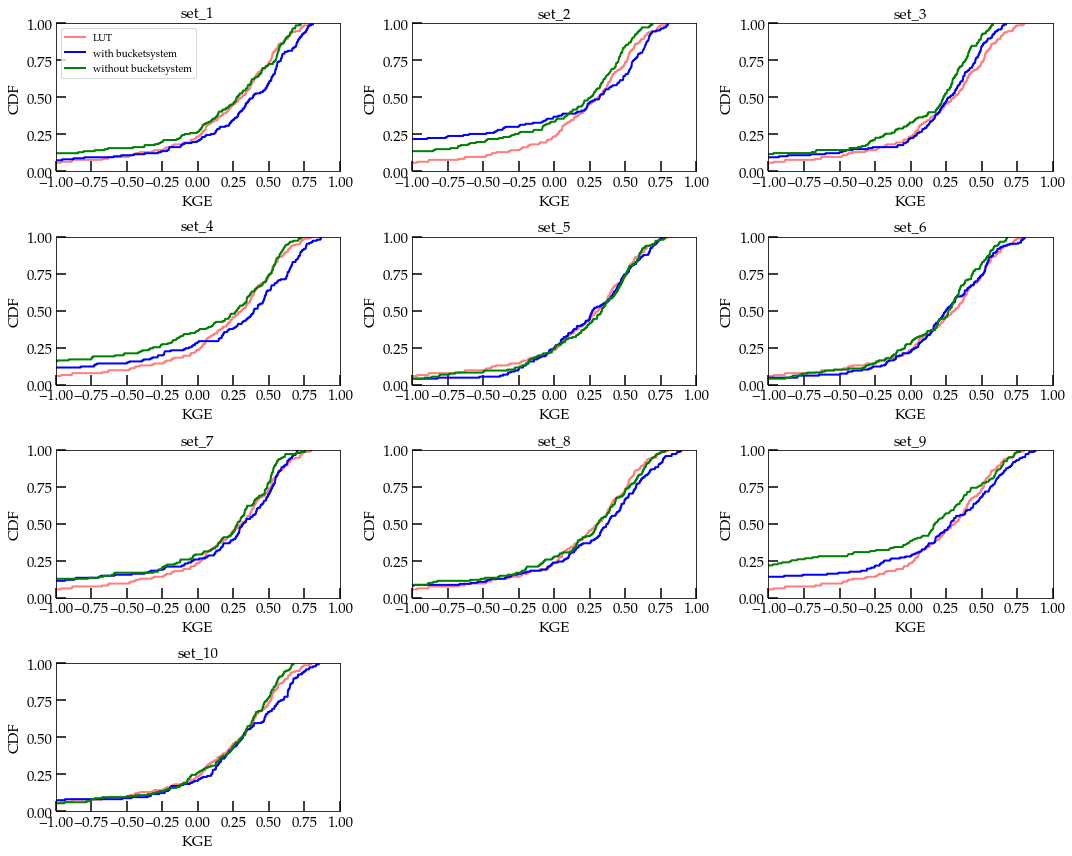

In [10]:
plt.rcParams["font.family"] = "P052"

group = 'with_bucket_system'

kge_threshold = -100
prune_kges = lambda vals, kge_threshold: [v for v in vals if v > kge_threshold]


def draw_cdf(ax, lut_kges, mbs_results, set_k):
    lh_lut = draw_empCDF(ax, list(lut_kges.values()))[0]
    lh_lut.set_color('r')
    lh_lut.set_linewidth(2.)
    lh_lut.set_alpha(0.5)
    lh_lut.set_label('LUT')

    lhs = {}
    data = mbs_results['with_bucket_system']
    lh = draw_empCDF(ax, prune_kges(np.array(data[set_k]), kge_threshold))[0]
#     lh.set_alpha(0.3)
    lh.set_linewidth(2)
    lh.set_color('b')
    lh.set_label('with bucketsystem')
    data = mbs_results['without_bucket_system']
    lh = draw_empCDF(ax, prune_kges(np.array(data[set_k]), kge_threshold))[0]
#     lh.set_alpha(0.3)
    lh.set_linewidth(2)
    lh.set_color('g')
    lh.set_label('without bucketsystem')

    
    ax.tick_params(direction='in',
                   length=10,
                   width=1.5,
                   labelsize=15)  
    ax.set_xticks(np.arange(-1, 1.1, .25))
    
    ax.set_xlabel('KGE', fontsize=15)
    ax.set_ylabel('CDF', fontsize=15)


    kwargs = {
        'title': group.replace('_', ' '),
        'ylim': [0, 1],
        'xlim': [-1, 1],
    }
    ax.set(**kwargs);
    ax.set_title(set_k, fontsize=15)

fig, axes = plt.subplots(4, 3, figsize=(15, 12))    
    

for idx, (set_k, ax) in enumerate(zip_axes(sets, axes)):
    
    
    draw_cdf(ax, lut_kges, mbs_results, set_k)
    if idx == 0:
        ax.legend()

plt.tight_layout()
plt.savefig('cv_multi.pdf')

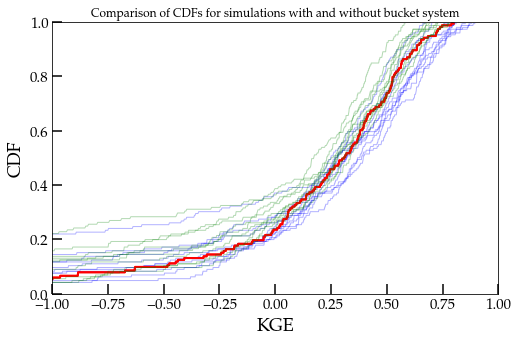

In [11]:
plt.rcParams["font.family"] = "P052"

group = 'with_bucket_system'

kge_threshold = -100
prune_kges = lambda vals, kge_threshold: [v for v in vals if v > kge_threshold]

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

def draw_cdf(ax, group, color, lut_kges, mbs_results):
    lh_lut = draw_empCDF(ax, list(lut_kges.values()))[0]
    lh_lut.set_color('r')
    lh_lut.set_linewidth(2)


    lhs = {}
    for set_k, v in mbs_results[group].items():
        lh = draw_empCDF(ax, prune_kges(np.array(v), kge_threshold))
        lhs[set_k] = {'lh': lh[0]}

    for lh in lhs.values():
        lh['lh'].set_alpha(0.3)
        lh['lh'].set_linewidth(1)
        lh['lh'].set_color(color)
    
    ax.tick_params(direction='in',
                   length=10,
                   width=1.5,
                   labelsize=15)  
    ax.set_xticks(np.arange(-1, 1.1, .25))
    
    ax.set_xlabel('KGE', fontsize=18)
    ax.set_ylabel('CDF', fontsize=18)


    kwargs = {
        'ylim': [0, 1],
        'xlim': [-1, 1],
    }
    ax.set(**kwargs);

    
draw_cdf(ax, 'with_bucket_system', 'blue', lut_kges, mbs_results)
draw_cdf(ax, 'without_bucket_system', 'green', lut_kges, mbs_results)
ax.set_title('Comparison of CDFs for simulations with and without bucket system');
    
# plt.savefig('cv_multi.pdf')